Without robot

In [3]:
import sys
sys.path.append('../../build')

import libry as ry
import os, copy

import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

**ry-c++-log** /home/olga/git/robotics-course/rai/rai/ry/ry.cpp:init_LogToPythonConsole:34(0) initializing ry log callback



In [4]:
RealWorld = ry.Config()
RealWorld.addFile(os.path.abspath('robot_scene/scene_camera.g'))
S = RealWorld.simulation(ry.SimulatorEngine.bullet, True)
S.addSensor("camera")

In [3]:
S.selectSensor("camera")
cameraFrame = RealWorld.frame("camera")
[rgb, depth] = S.getImageAndDepth()

In [4]:
depth.shape

(360, 640)

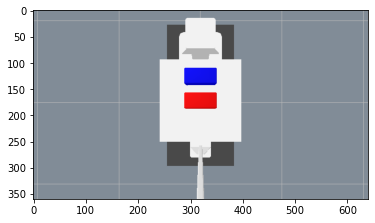

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(rgb)

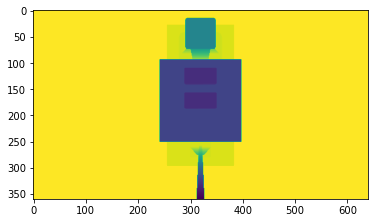

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(depth)

In [7]:
idx_list = np.arange(depth.shape[1])[depth[225,:]==np.min(depth[225,:])]

In [8]:
idx_left, idx_right = idx_list[0],idx_list[-1]

In [9]:
idx_left, idx_right

(242, 397)

In [10]:
depth_table_left = depth[:,idx_left]

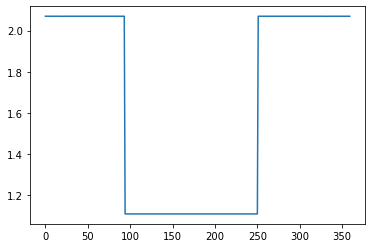

In [11]:
plt.plot(depth_table_left)

In [12]:
idx_list_2 = np.arange(depth.shape[0])[depth_table_left==np.min(depth_table_left)]

In [13]:
depth_left_diff = depth_table_left[1:] - depth_table_left[:-1]

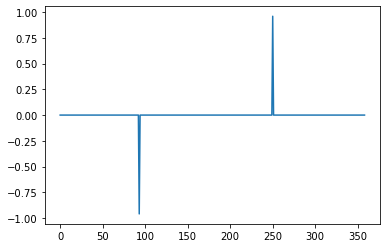

In [14]:
plt.plot(depth_left_diff)

In [15]:
idx_top, idx_bottom = np.argmin(depth_left_diff), np.argmax(depth_left_diff)

In [16]:
idx_top, idx_bottom 

(93, 250)

In [17]:
depth_table = depth[idx_top:idx_bottom,idx_left:idx_right]
depth_table.shape

(157, 155)

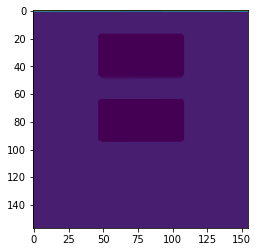

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(depth_table)

In [19]:
rgb_table = rgb[idx_top:idx_bottom,idx_left:idx_right]

In [20]:
rgb_table.shape

(157, 155, 3)

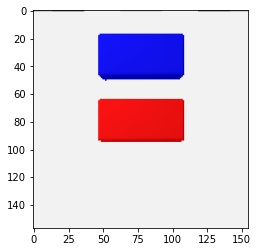

In [21]:
fig, ax = plt.subplots()
im = ax.imshow(rgb_table)

In [22]:
count_lst_1 = []
for i in range(depth_table.shape[1]):
    temp = len(np.unique(depth_table[:,:i,]))
    count_lst_1.append(temp)

count_array_1 = np.array(count_lst_1)

In [23]:
count_lst_2 = []
for i in range(depth_table.shape[0]):
    temp = len(np.unique(depth_table[:i,:]))
    count_lst_2.append(temp)
    
count_array_2 = np.array(count_lst_2)

In [24]:
diff_count_1 = count_array_1[1:]-count_array_1[:-1]
diff_count_2 = count_array_2[1:]-count_array_2[:-1]

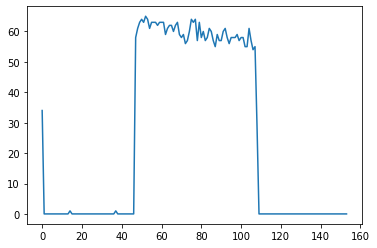

In [25]:
plt.plot(diff_count_1)

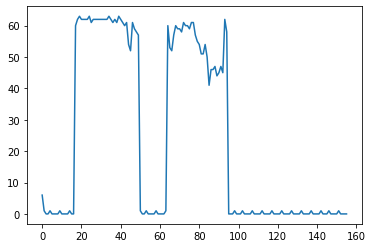

In [26]:
plt.plot(diff_count_2)

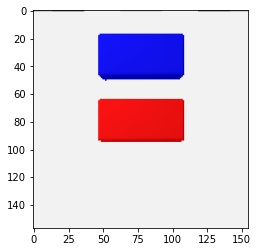

In [27]:
fig, ax = plt.subplots()
im = ax.imshow(rgb_table)

In [28]:
rgb_table.shape

(157, 155, 3)

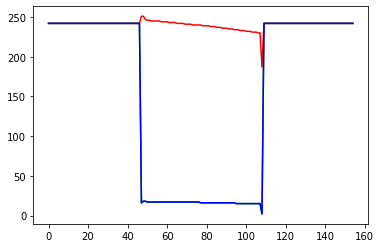

In [29]:
plt.plot(rgb_table[80,:,0], color='red')
plt.plot(rgb_table[80,:,1],  color='green')
plt.plot(rgb_table[80,:,2],  color='blue')

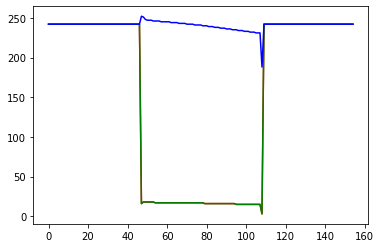

In [30]:
plt.plot(rgb_table[30,:,0], color='red')
plt.plot(rgb_table[30,:,1],  color='green')
plt.plot(rgb_table[30,:,2],  color='blue')

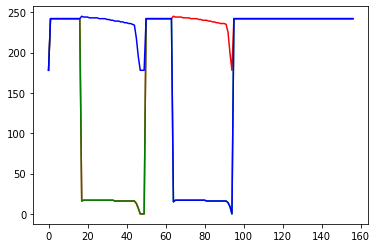

In [31]:
plt.plot(rgb_table[:,75,0], color='red')
plt.plot(rgb_table[:,75,1],  color='green')
plt.plot(rgb_table[:,75,2],  color='blue')

In [32]:
channel_helper = {'blue':0, 'red':2}

In [33]:
result_blue = rgb_table.copy()
lower = np.array([0])
upper = np.array([25])
mask_blue = cv.inRange(rgb_table[:,:,0], lower, upper)
result_blue = cv.bitwise_and(result_blue, result_blue, mask=mask_blue)

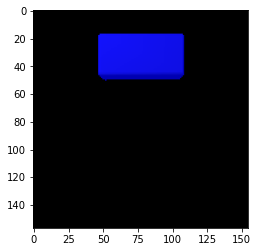

In [34]:
plt.imshow(result_blue)
plt.show()

In [35]:
np.unique(mask_blue)

array([  0, 255], dtype=uint8)

In [36]:
blue_idx_table = np.argwhere(mask_blue==255)

In [37]:
point_min, point_max = np.min(blue_idx_table, axis=0), np.max(blue_idx_table, axis=0)
point_min, point_max

(array([17, 47]), array([ 50, 108]))

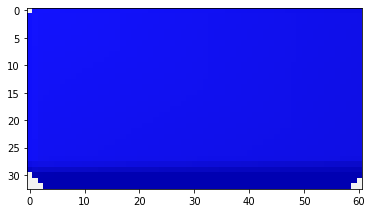

In [38]:
blue_obj_table = rgb_table[point_min[0]:point_max[0], point_min[1]:point_max[1]]
plt.imshow(blue_obj_table)
plt.show()

In [39]:
result_red = rgb_table.copy()
lower = np.array([0])
upper = np.array([25])
mask_red = cv.inRange(rgb_table[:,:,2], lower, upper)
result_red = cv.bitwise_and(result_red, result_red, mask=mask_red)

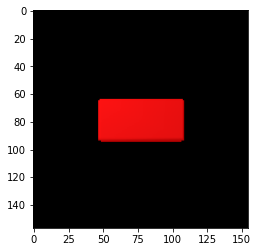

In [40]:
plt.imshow(result_red)
plt.show()

In [23]:
channel_helper = {'blue':0, 'red':2}
def get_coordinates(img, color, channel_helper):
    result = img.copy()
    lower = np.array([0])
    upper = np.array([25])
    channel = channel_helper[color]
    mask = cv.inRange(img[:,:,channel], lower, upper)
    idx_img = np.argwhere(mask==255)
    point_min, point_max = np.min(idx_img, axis=0), np.max(idx_img, axis=0)
    (y_min, x_min), (y_max, x_max) = np.min(idx_img, axis=0), np.max(idx_img, axis=0)
    y_min, y_max = np.min([y_min, y_max]), np.max([y_min, y_max])
    x_min, x_max = np.min([x_min, x_max]), np.max([x_min, x_max])
    
    # obj_img = img[y_min:y_max, x_min:x_max]
    idx_img = {'00':y_min, '01':y_max, '10':x_min, '11':x_max}
    # obj_img = img[idx_img['00']:idx_img['01'], idx_img['10']:idx_img['11']]
    return idx_img

In [6]:
def select_object_by_idx_img(img, idx_img):
    return img[idx_img['00']:idx_img['01'], idx_img['10']:idx_img['11']]
    

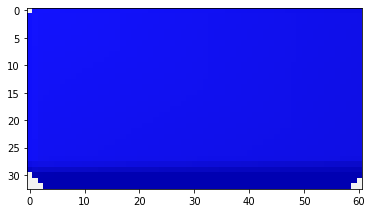

In [43]:
idx_blue_table = get_coordinates(rgb_table, 'blue', channel_helper)
obj_blue = select_object_by_idx_img(rgb_table, idx_blue_table)
plt.imshow(obj_blue)
plt.show()

In [44]:
idx_blue_table

{'00': 17, '01': 50, '10': 47, '11': 108}

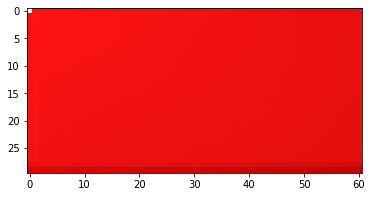

In [45]:
idx_red_table = get_coordinates(rgb_table, 'red', channel_helper)
obj_red = select_object_by_idx_img(rgb_table, idx_red_table)
plt.imshow(obj_red)
plt.show()

In [46]:
idx_red_table

{'00': 64, '01': 94, '10': 47, '11': 108}

In [47]:
idx_top, idx_left

(93, 242)

In [48]:
idx_table_scene = {}
for key in ['00','01']:
    idx_table_scene[key] = idx_top
for key in ['10','11']:
    idx_table_scene[key] = idx_left
    

In [7]:
def adjustCoordinates(idx_table_scene, idx_obj_table):
    idx_obj_scene = {}
    for key in idx_obj_table.keys():
        idx_obj_scene[key] = idx_obj_table[key] + idx_table_scene[key]
    
    return idx_obj_scene

In [50]:
idx_red_scene = adjustCoordinates(idx_table_scene, idx_red_table)
idx_red_scene

{'00': 157, '01': 187, '10': 289, '11': 350}

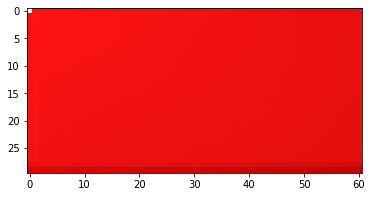

In [51]:
obj_red_scene = select_object_by_idx_img(rgb, idx_red_scene)
plt.imshow(obj_red_scene)
plt.show()

In [52]:
idx_blue_scene = adjustCoordinates(idx_table_scene, idx_blue_table)
idx_blue_scene

{'00': 110, '01': 143, '10': 289, '11': 350}

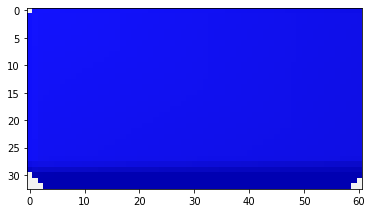

In [53]:
obj_blue_scene = select_object_by_idx_img(rgb, idx_blue_scene)
plt.imshow(obj_blue_scene)
plt.show()

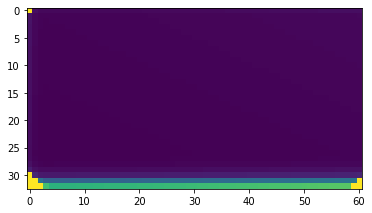

In [54]:
depth_blue_scene = select_object_by_idx_img(depth, idx_blue_scene)
plt.imshow(depth_blue_scene)
plt.show()

In [55]:
np.unique(depth_blue_scene), np.min(depth_blue_scene), np.max(depth_blue_scene)

(array([1.0200397, 1.0200527, 1.0200658, ..., 1.1100032, 1.1100034,
        1.1100043], dtype=float32),
 1.0200397,
 1.1100043)

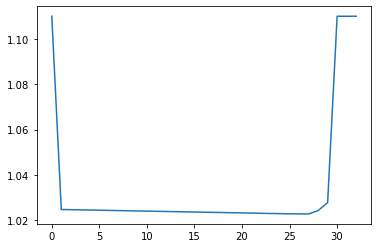

In [56]:
plt.plot(depth_blue_scene[:,0])

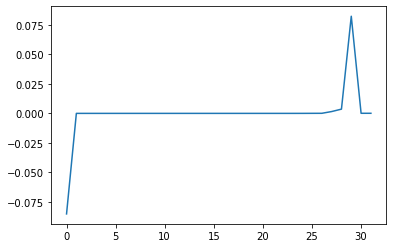

In [57]:
diff = depth_blue_scene[1:, 0] - depth_blue_scene[:-1, 0]
plt.plot(diff)

In [58]:
trim = np.argwhere(diff>0)[0][0]
trim

27

In [59]:
offset = np.argwhere(diff==0.000)[0][0]
offset

30

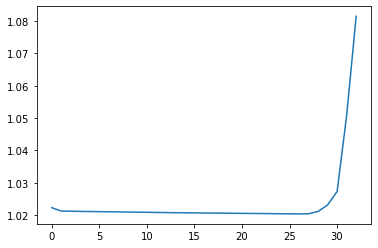

In [60]:
plt.plot(depth_blue_scene[:,30])

In [61]:
diff = depth_blue_scene[1:, 30] - depth_blue_scene[:-1, 30]

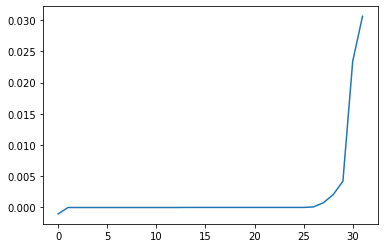

In [62]:
plt.plot(diff)

In [63]:
idx_blue_scene

{'00': 110, '01': 143, '10': 289, '11': 350}

In [64]:
idx_blue_scene['01'] -= (depth_blue_scene.shape[0]-trim)
idx_blue_scene

{'00': 110, '01': 137, '10': 289, '11': 350}

In [65]:
idx_blue = np.array([0.5*(idx_blue_scene['00']+idx_blue_scene['01']), 0.5*(idx_blue_scene['10']+idx_blue_scene['11'])])
idx_blue

array([123.5, 319.5])

In [66]:
idx_blue = list(map(int, idx_blue))
idx_blue

[123, 319]

In [8]:
def centre_coordinate(idx_scene):
    idx = np.array([0.5*(idx_scene['00']+idx_scene['01']), 0.5*(idx_scene['10']+idx_scene['11'])])
    idx = list(map(int, idx))
    return idx

### Converting from image coordinates to the camera coordinates

In [68]:
#the focal length
f = 0.895
f = f * 360.
fxfypxpy = [f, f, 320., 180.]

In [69]:
points = S.depthData2pointCloud(depth, fxfypxpy)

In [70]:
points.shape

(360, 640, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


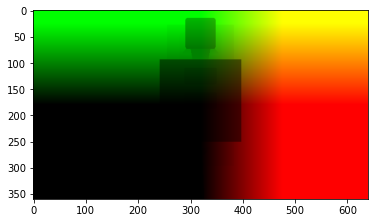

In [71]:
plt.imshow(points)
plt.show()

In [72]:
np.min(points), np.max(points)

(-2.070007085800171, 2.049448251724243)

In [73]:
np.min(depth), np.max(depth)

(0.8615934, 2.070007)

In [74]:
# Camera parameters
camera_position = cameraFrame.getPosition()
camera_rotation = cameraFrame.getRotationMatrix()

In [75]:
depth_img = points[idx_blue[0], idx_blue[1]]
depth_img

array([-0.00316813,  0.18058321, -1.02077043])

In [76]:
# Convert image coordinates to camera coordinates
idx_img_blue_camera = np.zeros(camera_position.shape)
idx_img_blue_camera[:2] = depth_img[:2]*np.array(idx_blue, dtype='float')/f
idx_img_blue_camera[-1] = depth_img[-1]
idx_img_blue_camera

array([-0.00120943,  0.17878971, -1.02077043])

In [77]:
idx_blue_world = camera_position + camera_rotation@idx_img_blue_camera
idx_blue_world

array([ 0.00120943, -0.15378555,  1.04923245])

In [9]:
def convert_idx_to_world(RealWorld, S, f, depth, idx):
    cameraFrame = RealWorld.frame("camera")
    camera_position = cameraFrame.getPosition()
    camera_rotation = cameraFrame.getRotationMatrix()
    f = f * 360.
    fxfypxpy = [f, f, 320., 180.]
    points = S.depthData2pointCloud(depth, fxfypxpy)
    depth_img = points[idx[0], idx[1]]
    
    idx_img_camera = np.zeros(camera_position.shape)
    idx_img_camera[:2] = depth_img[:2]*np.array(idx, dtype='float')/f
    idx_img_camera[-1] = depth_img[-1]

    idx_world = camera_position + camera_rotation@idx_img_camera
    return idx_world

In [79]:
obj1 = RealWorld.getFrame("obj1")
idx_blue = centre_coordinate(idx_blue_scene)
obj1_world = convert_idx_to_world(RealWorld, S, 0.895, depth, idx_blue)
obj1_world, obj1.getPosition()

(array([ 0.00120943, -0.15378555,  1.04923245]), array([ 0.  , -0.15,  1.  ]))

In [29]:
obj1 = RealWorld.getFrame("obj1")

In [80]:
obj0 = RealWorld.getFrame("obj0")
idx_red = centre_coordinate(idx_red_scene)
obj0_world = convert_idx_to_world(RealWorld, S, 0.895, depth, idx_red)
obj0_world, obj0.getPosition()

(array([ 1.69115785e-03, -8.79082087e-05,  1.04928187e+00]),
 array([0., 0., 1.]))

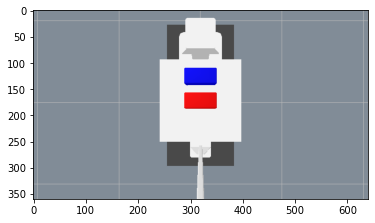

In [81]:
plt.imshow(rgb)
plt.show()

In [12]:
def get_table_idx(depth):
    idx_list = np.arange(depth.shape[1])[depth[225,:]==np.min(depth[225,:])]
    idx_left, idx_right = idx_list[0],idx_list[-1]
    depth_table_left = depth[:,idx_left]
    idx_list_2 = np.arange(depth.shape[0])[depth_table_left==np.min(depth_table_left)]
    depth_left_diff = depth_table_left[1:] - depth_table_left[:-1]
    idx_top, idx_bottom = np.argmin(depth_left_diff), np.argmax(depth_left_diff)

    return idx_top, idx_bottom, idx_left, idx_right

In [30]:
def give_center_by_color(color, RealWorld, S, f=0.895):
    S.selectSensor("camera")
    cameraFrame = RealWorld.frame("camera")
    [rgb, depth] = S.getImageAndDepth()

    # Cut the table
    idx_top, idx_bottom, idx_left, idx_right = get_table_idx(depth)
    rgb_table = rgb[idx_top:idx_bottom,idx_left:idx_right]
    
    # Get coordinates of object by color on the table
    channel_helper = {'blue':0, 'red':2}
    idx_object_table = get_coordinates(rgb_table, color, channel_helper)
    
    # Table coordinates
    idx_table_scene = {}
    for key in ['00','01']:
        idx_table_scene[key] = idx_top
    for key in ['10','11']:
        idx_table_scene[key] = idx_left

    # Adjust object coordinates on the table to the image coordinates
    idx_object_scene = adjustCoordinates(idx_table_scene, idx_object_table)
    idx_object = centre_coordinate(idx_object_scene)
    obj_world = convert_idx_to_world(RealWorld, S, f, depth, idx_object)

    return obj_world

In [31]:
obj0_world = give_center_by_color('red', RealWorld, S)
print('obj0_world:',obj0_world)
print('obj0.getPosition():',obj0.getPosition())

obj0_world: [ 1.69115785e-03 -8.79082087e-05  1.04928187e+00]
obj0.getPosition(): [0. 0. 1.]


In [32]:
obj1_world = give_center_by_color('blue', RealWorld, S)
print('obj1_world:',obj1_world)
print('obj1.getPosition():',obj1.getPosition())

obj1_world: [ 0.00123883 -0.14436092  1.04932074]
obj1.getPosition(): [ 0.   -0.15  1.  ]
